In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
from talib import abstract
import yfinance as yfin

In [16]:
df = yfin.download('SPY', start = '2012-1-1', end = '2024-7-8').round(3)
df.columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
df

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,adj_close,volume
Date,,,,,,
2012-01-03,127.76,128.38,127.43,127.50,101.402,193697900
2012-01-04,127.20,127.81,126.71,127.70,101.561,127186500
2012-01-05,127.01,128.23,126.43,128.04,101.832,173895000
2012-01-06,128.20,128.22,127.29,127.71,101.569,148050000
2012-01-09,128.00,128.18,127.41,128.02,101.816,99530200
...,...,...,...,...,...,...
2024-06-28,547.16,550.28,542.95,544.22,544.220,76144500
2024-07-01,545.63,545.88,542.52,545.34,545.340,40297800
2024-07-02,543.70,549.01,543.65,549.01,549.010,40434800


In [17]:
df['sma1'] = abstract.MA(df, 20, matype = 0)
df['sma2'] = talib.MA(df['close'], 120, matype = 0)
df['no.'] = range(len(df))
df

,open,high,low,close,adj_close,volume,sma1,sma2,no.
Date,,,,,,,,,
2012-01-03,127.76,128.38,127.43,127.50,101.402,193697900,NaN,NaN,0
2012-01-04,127.20,127.81,126.71,127.70,101.561,127186500,NaN,NaN,1
2012-01-05,127.01,128.23,126.43,128.04,101.832,173895000,NaN,NaN,2
2012-01-06,128.20,128.22,127.29,127.71,101.569,148050000,NaN,NaN,3
2012-01-09,128.00,128.18,127.41,128.02,101.816,99530200,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...
2024-06-28,547.16,550.28,542.95,544.22,544.220,76144500,539.8435,512.216417,3141
2024-07-01,545.63,545.88,542.52,545.34,545.340,40297800,540.7420,512.805917,3142
2024-07-02,543.70,549.01,543.65,549.01,549.010,40434800,541.8025,513.432000,3143


<Axes: xlabel='Date'>

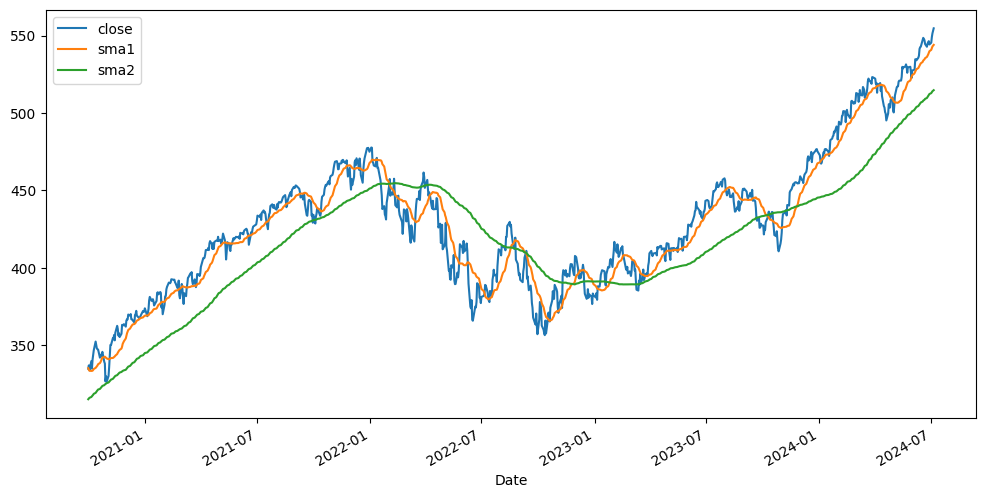

In [18]:
df[['close', 'sma1', 'sma2']][2200:].plot(figsize = (12, 6))

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_14712/30720268.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if condition1[i]:
/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_14712/30720268.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif condition2[i]:


<Axes: xlabel='Date'>

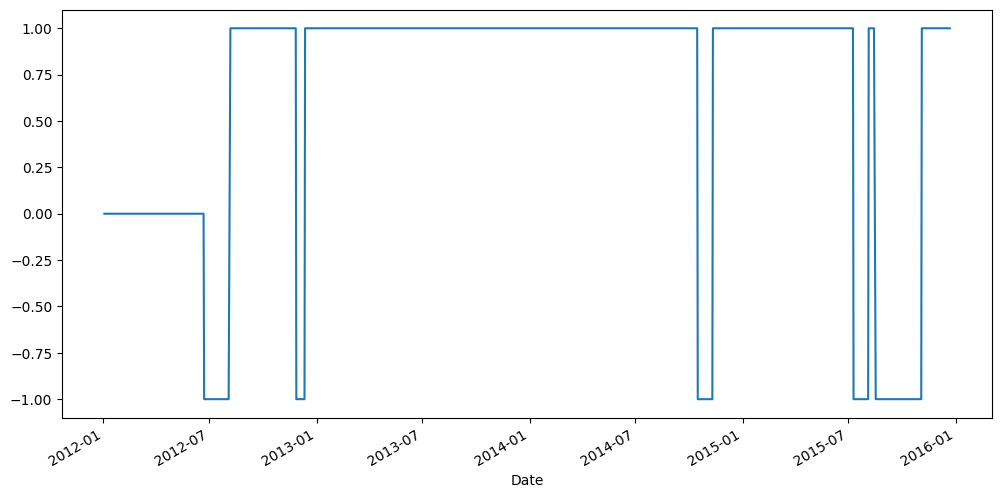

In [19]:
# 開始執行策略
signal = np.zeros([len(df)])
condition1 = df['sma1'] > df['sma2']
condition2 = df['sma1'] < df['sma2']
for i in range(len(df)):
    if condition1[i]:
        signal[i] = 1
    elif condition2[i]:
        signal[i] = -1

signal_df = pd.Series(signal, index = df.index)
plt.figure(figsize = (12, 6))
signal_df[: 1000].plot()

<Axes: xlabel='Date'>

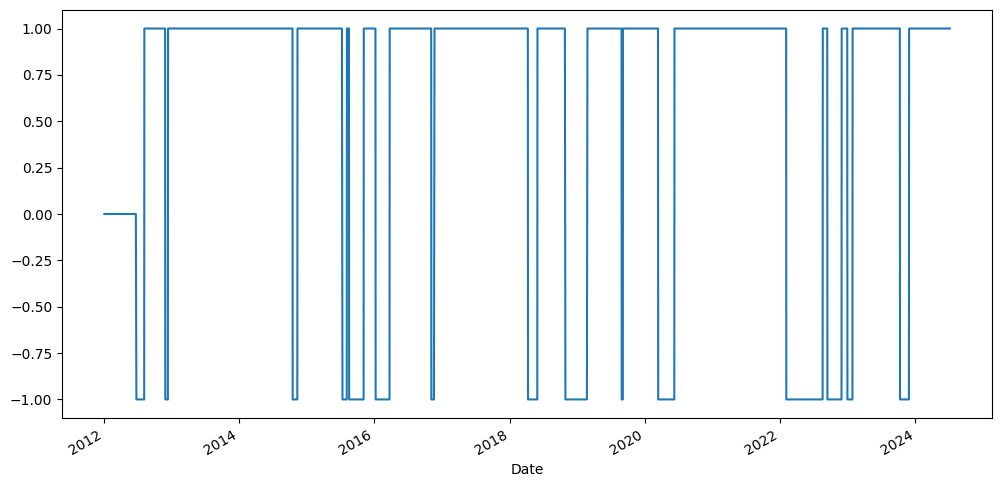

In [20]:
position_df = signal_df.shift(1)
position_df.plot(figsize = (12, 6))

In [21]:
# 計算報酬
df['position'] = position_df
df = df[['close', 'sma1', 'sma2', 'position']].dropna()
df['ret'] = df['close'].pct_change()
df['cum_ret'] = df['ret'].cumsum()

In [22]:
strategy_ret = np.zeros(len(df))
#這種可針對不同報酬，如借券利息等進行細部計算
for i in range(len(df)):
    if df['position'][i] == 1:
        strategy_ret[i] = df['ret'][i] * df['position'][i]
    elif df['position'][i] == -1:
        strategy_ret[i] = df['ret'][i] * df['position'][i]
# 這種比較直接
strategy_ret = df['ret'] * df['position']
df['strategy_ret'] = strategy_ret
df['cum_strategy_ret'] = df['strategy_ret'].cumsum()

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_14712/1022210121.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['position'][i] == 1:
/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_14712/1022210121.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['position'][i] == -1:
/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_14712/1022210121.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

Text(0.5, 1.0, 'Stock & Total Return')

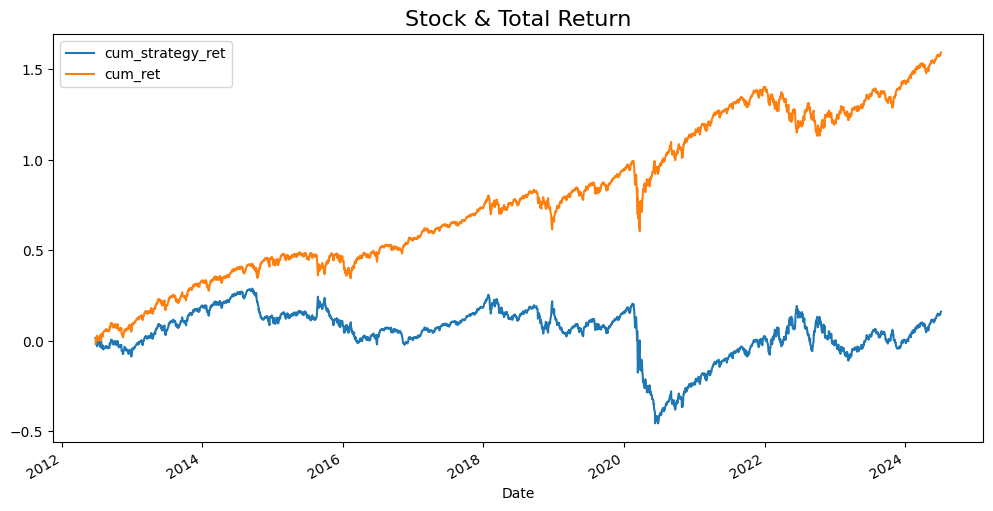

In [23]:
fig, ax = plt.subplots(figsize = (12, 6))
df[['cum_strategy_ret', 'cum_ret']].plot(label = 'Total return', ax = ax)
plt.legend()
plt.title('Stock & Total Return', fontsize = 16)

Text(0.5, 1.0, 'Cumulative Return')

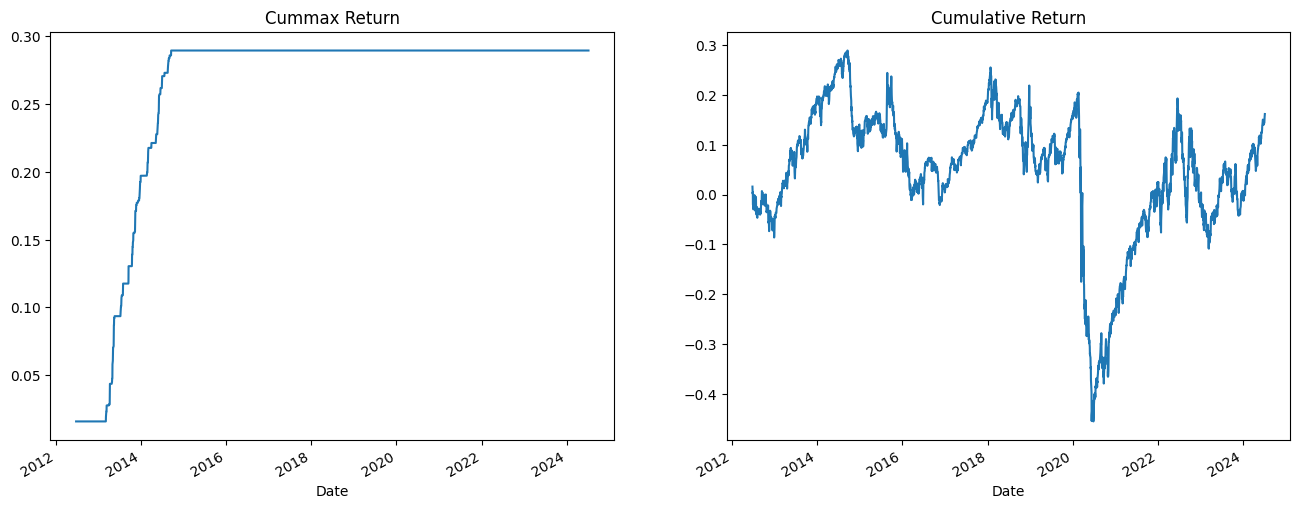

In [24]:
# 分析
fig = plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
df['cum_strategy_ret'].cummax().plot()
plt.title('Cummax Return')
plt.subplot(1, 2, 2)
df['cum_strategy_ret'].plot()
plt.title('Cumulative Return')

<Axes: xlabel='Date'>

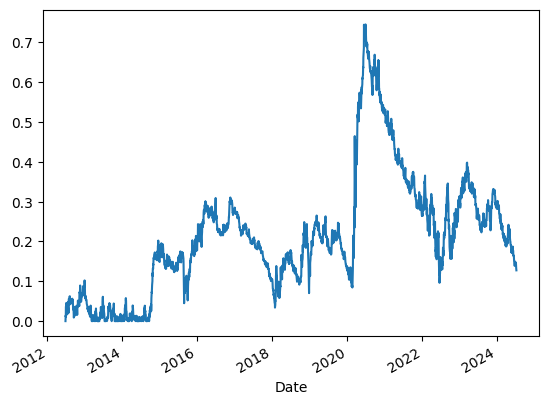

In [25]:
# 算MDD
MDD_series = df['cum_strategy_ret'].cummax() - df['cum_strategy_ret']
MDD_series.plot()

In [26]:
high_index = df['cum_strategy_ret'][df['cum_strategy_ret'].cummax() == df['cum_strategy_ret']].index

Text(0.5, 1.0, 'Return & MDD')

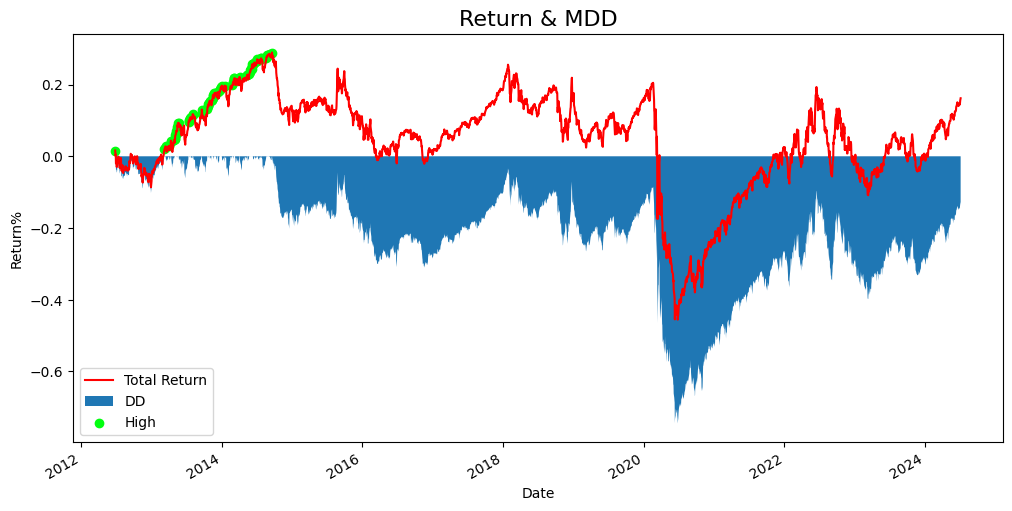

In [27]:
# 資料視覺化
fig, ax = plt.subplots(figsize = (12, 6))
df['cum_strategy_ret'].plot(label = 'Total Return', ax = ax, c = 'r')
plt.fill_between(MDD_series.index, -MDD_series, 0, label = 'DD')
plt.scatter(high_index, df['cum_strategy_ret'].loc[high_index], c = '#02ff0f', label = 'High')
plt.legend()
plt.ylabel('Return%')
plt.xlabel('Date')
plt.title('Return & MDD', fontsize = 16)

In [28]:
# 指標
MDD = round(MDD_series.max(), 2) * 100
Cumulative_Return = round(df['cum_strategy_ret'].iloc[-1], 2) * 100
Return_on_MDD = round(df['cum_strategy_ret'].iloc[-1]/MDD_series.max(), 2)
daily_return = df['cum_strategy_ret'].diff(1)

print('Cumulative Return: {}%'.format(Cumulative_Return))
print('MDD: {}%'.format(MDD))
print('Return on MDD: {}'.format(Return_on_MDD))
print('Sharpe Ratio: {}'.format(round((daily_return.mean()/daily_return.std()) * pow(252, 0.5), 2)))

Cumulative Return: 16.0%
MDD: 75.0%
Return on MDD: 0.22
Sharpe Ratio: 0.07
